# Implement a KNN model to classify the animals in to categorie

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
Zoo=pd.read_csv("F:/ExcelR workings/Assignments/KNN/Zoo.csv")

In [3]:
Zoo.head(10)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [4]:
Zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
Zoo.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [6]:
Zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


* animal name is the column whch is categorical in nature. So, we converted into dummy variables
* if we look at all the columns, all the variables except legs are binary values in nature. 
* Legs column is actually a set of values which being repeated. So, we tend to factorize the variable.


In [7]:
Zoo["legs"],_=pd.factorize(Zoo["legs"])

### Conversion into Dummy Variables

In [8]:
dummy=pd.get_dummies(Zoo["animal name"],drop_first =True)

In [9]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 99 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   antelope  101 non-null    uint8
 1   bass      101 non-null    uint8
 2   bear      101 non-null    uint8
 3   boar      101 non-null    uint8
 4   buffalo   101 non-null    uint8
 5   calf      101 non-null    uint8
 6   carp      101 non-null    uint8
 7   catfish   101 non-null    uint8
 8   cavy      101 non-null    uint8
 9   cheetah   101 non-null    uint8
 10  chicken   101 non-null    uint8
 11  chub      101 non-null    uint8
 12  clam      101 non-null    uint8
 13  crab      101 non-null    uint8
 14  crayfish  101 non-null    uint8
 15  crow      101 non-null    uint8
 16  deer      101 non-null    uint8
 17  dogfish   101 non-null    uint8
 18  dolphin   101 non-null    uint8
 19  dove      101 non-null    uint8
 20  duck      101 non-null    uint8
 21  elephant  101 non-null    uint8
 22  fl

In [10]:
Zoo = pd.concat([Zoo,dummy],axis=1)

In [11]:
#Droping
zoo = Zoo.drop(["animal name"],axis=1)

In [46]:
x=zoo.drop(["type"],axis=1)
y=zoo.iloc[:,16]

### Normalize the data

In [13]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

x_n = norm_func(x)

In [14]:
x_n

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,tuatara,tuna,vampire,vole,vulture,wallaby,wasp,wolf,worm,wren
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
97,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
98,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

## Splitting the data into train and test data

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x_n, y, test_size =0.2)

In [17]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((80, 115), (21, 115), (80,), (21,))

# Model Building

In [35]:
model1 =KNeighborsClassifier(n_neighbors=9)
model1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

#### Accuracy on train data

In [36]:
np.mean((model1.predict(x_train)==y_train))

0.9125

#### Accuracy on test data

In [37]:
np.mean(model1.predict(x_test)==y_test)

0.9047619047619048

## Grid Search

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
n_neighbors=np.array(range(1,40,2))
param_grid=dict(n_neighbors=n_neighbors)

In [40]:
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x_train,y_train)

C:\Users\sanjaysagar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])})

In [42]:
print(grid.best_score_)
print(grid.best_params_)

0.95
{'n_neighbors': 3}


# Model Building

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc_=accuracy_score(y_test,y_pred)
print("Accuracy = ",acc_)

Accuracy =  0.9523809523809523


## Plot
* Train accuracy plot
* Test accuracy plot

In [21]:
import matplotlib as plt

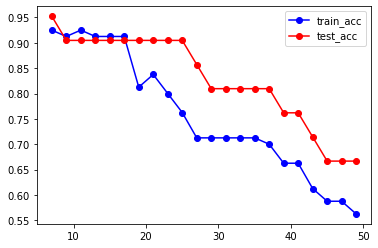

In [22]:
acc=[]
for i in range(7,50,2):
    model2=KNeighborsClassifier(n_neighbors = i)
    model2.fit(x_train,y_train)
    train_acc = np.mean(model2.predict(x_train)==y_train)
    test_acc = np.mean(model2.predict(x_test)==y_test)
    acc.append([train_acc,test_acc])
    
import matplotlib.pyplot as plt

##training accuracy plot
plt.plot(np.arange(7,50,2),[i[0] for i in acc],"bo-")

##test accuracy plot
plt.plot(np.arange(7,50,2),[i[1] for i in acc],"ro-")    

plt.legend(["train_acc", "test_acc"])



## Maximum Accuracy according to grid search is 'n_neighbors' value at '3' but where errors possibility is less according to plot that is on '9'.